In [3]:
from TP06_K_means.src.utils import *
from TP07_K_plus_proches_voisins.src.knn_validation import *
from TP07_K_plus_proches_voisins.src.knn_cross_validation import *
from TP07_K_plus_proches_voisins.src.nearest_prototypes import *
from TP07_K_plus_proches_voisins.src.utils import *
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings ("ignore")

SyntaxError: cannot assign to Ellipsis (knn_validation.py, line 31)

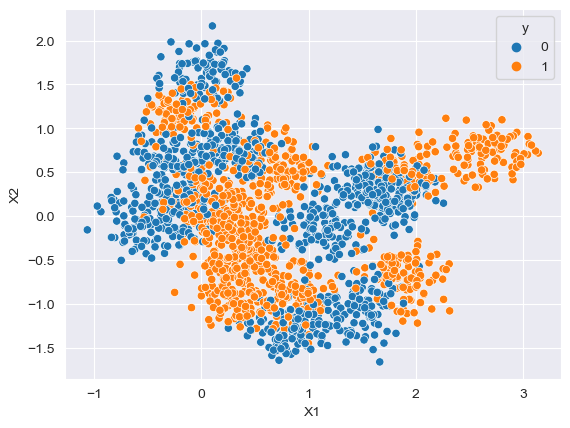

In [4]:
#Q1
import pandas as pd
Xy = pd.read_csv("TP07_K_plus_proches_voisins/data/Synth1-2000.csv")
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]
plot_clustering(X, y)
plt.show()

In [6]:
#Q2
from sklearn.neighbors import KNeighborsClassifier
cls = KNeighborsClassifier(n_neighbors=5)
cls.fit(X, y)
Y = np.array([[0, 0], [0, -1], [1, 0], [1, 1]])
labels = cls.predict(Y)
labels

/Users/zhangcheng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/zhangcheng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 0, 1])

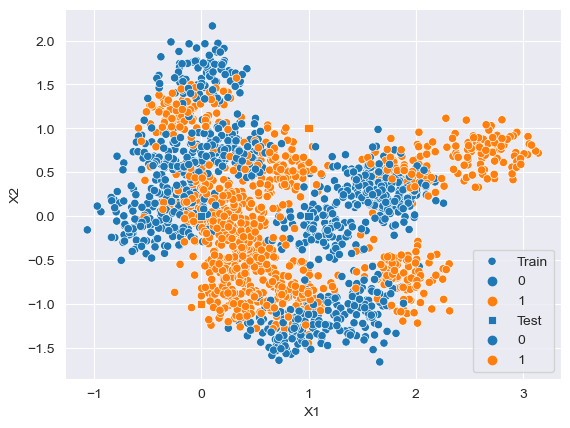

In [7]:
ax, pca = plot_clustering(X, y, label="Train")
sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=labels, marker="s", ax=ax,label="Test")
plt.show()

/Users/zhangcheng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/zhangcheng/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


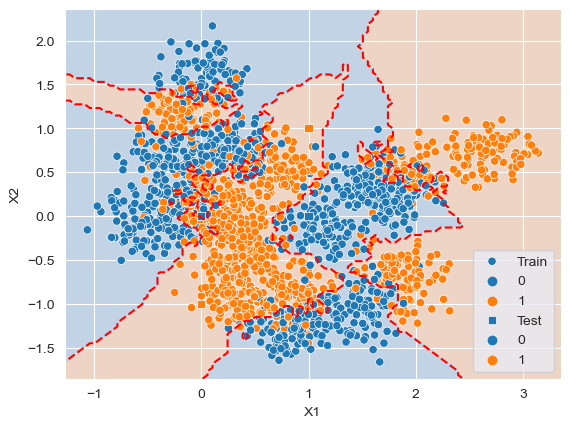

In [11]:
#Q3
from TP07_K_plus_proches_voisins.src.utils import *
ax, pca = plot_clustering(X, y, label="Train")
sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=labels, marker="s", ax=ax,label="Test")
add_decision_boundary(cls)
plt.show()

In [12]:
#Q4
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.66)

In [15]:
#Q5
# De 1 à 500 voisins (exclu), échelle logarithmique
from TP07_K_plus_proches_voisins.src.knn_validation import *
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500,100)).astype(int))
gen = knn_simple_validation(X_train, y_train, X_val, y_val, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])
sp = sns.lineplot(x="degrés de liberté", y="accuracy", data=df)
sp.set(xscale="log")
plt.show()
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt
cls = KNeighborsClassifier(n_neighbors=Kopt)
cls.fit(X, y)
plot_clustering(X, y)
add_decision_boundary(cls)
plt.show()

SyntaxError: cannot assign to Ellipsis (knn_validation.py, line 31)

In [ ]:
#Q6
